<a href="https://colab.research.google.com/github/YKochura/ai-lab/blob/main/linear-regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лінійна регресія** &mdash; статистичний регресійний метод, який застосовують для моделювання взаємозв'язку між скалярною залежною змінною $\hat{y}$ та однією або кількома незалежними змінними $\boldsymbol X$.

Наприклад, ми можемо за допомогою лінійної регресії передбачати значення неперервної залежної змінної: температуру повітря, ціну акацій, тощо, використовуючи додаткову інформацію, яка характеризує задачу і представлена  в незалежній змінній $\boldsymbol X$. Ця додаткова інформація представляє собою набір вхідних ознак за якими буде здійснюватись моделювання.


# Модель лінійної регресії

![](https://docs.google.com/uc?export=download&id=1FAY4ZeGCJ1n14d14LtivoYDsz-LhgUpH)

Метод лінійної регресії полягає у знаходженні лінійної комбінації вхідних ознак (зважена сума) з урахуванням зміщення.

$$\hat y = z = \sum_{i=1}^m w_i x_i  + b$$




Для вирішення задачі

**Дано:**

- Навчальний набір: $\{(\boldsymbol{X}^{(1)}, y^{(1)}), (\boldsymbol{X}^{(2)}, y^{(2)}),..., (\boldsymbol{X}^{(n)}, y^{(n)})\}$

  - де $\boldsymbol{X}^{(i)}$ &mdash;  $i$-й навчальний приклад. Є $m$-вимірним вектором-стовпцем $\boldsymbol{X}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$
  - $n$ &mdash; загальна кількість навчальних прикладів
  - $y^{(i)}$ &mdash; дійсне цільове значення $i$-го навчального прикладу , $y^{(i)} \in \mathbb{R}$

Модель лінійної регресії:

- має вектор-рядок дійсних значень ваг $\boldsymbol{W} = \begin{bmatrix}
w_1 & w_2 & \cdots & w_m
\end{bmatrix}$
- має дійсне значення зміщення $b$


# Навчання

Ми можемо навчити модель, використовуючи градієнтний спуск. Фактично, **градієнтний спуск** або будь-який інший алгоритм оптимізації дозволяє знайти глобальний мінімум цільової функції, якщо підбрано оптимальну швидкість навчання та виконано достатню кількість ітерацій навчання.

Навчання лінійної регресії має різні етапи. На початку (крок 0) ініціалізуються параметри моделі. Інші кроки повторюються протягом певної кількості епох (навчальних ітерацій).

**Крок 0:** Ініціалізувати ваги та зсув (наприклад, випадковими значеннями з нормального розподілу)

**Крок 1:** Обчислити лінійну комбінацію вхідних ознак та ваг і додати зсув.  Це можна зробити за один крок для всіх навчальних прикладів, використовуючи [векторизацію (vectorization)](https://www.geeksforgeeks.org/vectorization-in-python/) та  [трансляцію (broadcasting)](https://www.geeksforgeeks.org/python-broadcasting-with-numpy-arrays/)

$$\hat y =  z = W \cdot X + b$$

де $\cdot$ скалярний добуток (поелементний добуток), $W$ &mdash;  вектор-рядок ваг з формою $(1, m)$, $X$ &mdash; матриця форми $(m, n)$, $\hat y$ &mdash; прогноз моделі.


**Крок 2:** Обчислити усереднену втрату на всьому навчальному наборі даних. Функцію, яка визначає усереднені втрати на всьому навчальному наборі даних, часто називають цільовою функцією або імпіричним ризиком. Основна задача оптимізаційного алгоритму &mdash;  мінімізувати у процесі навчання цільову функцію на стільки, на скільки це можливо, не втрачаючи при цьому здатності моделі узагальнювати на нових даних. Для лінійної регресії будемо розраховувати середнє квадратичне відхилення:

$$\mathcal{J}(\hat y,y)  = \frac{1}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big)^2$$

**Крок 3:** Розрахувати градієнти цільвої функції відносно ваг та зсуву:

$$\boxed{\begin{aligned}
\frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} &= \frac{2}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big)   \\[12pt]
\frac{\partial \mathcal{J}(\hat y, y)}{\partial W } = \frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial W }  &= \frac{2}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big) x^{(i)}   \\[12pt]
\frac{\partial \mathcal{J}(\hat y, y)}{\partial b} =  \frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial b }&=  \frac{2}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big)
\end{aligned}}$$

**Крок 4:** Оновити ваги та зсув моделі:

$$\boxed{\begin{aligned}
W &= W - \alpha \frac{\partial \mathcal{J}(\hat y, y)}{\partial W} \\[12pt]
b &= b - \alpha \frac{\partial \mathcal{J}(\hat y, y)}{\partial b}
\end{aligned}}$$

де $\alpha$ &mdash; швидкість навчання (крок навчання).

# Імпортупвання бібліотек

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

## Датасет

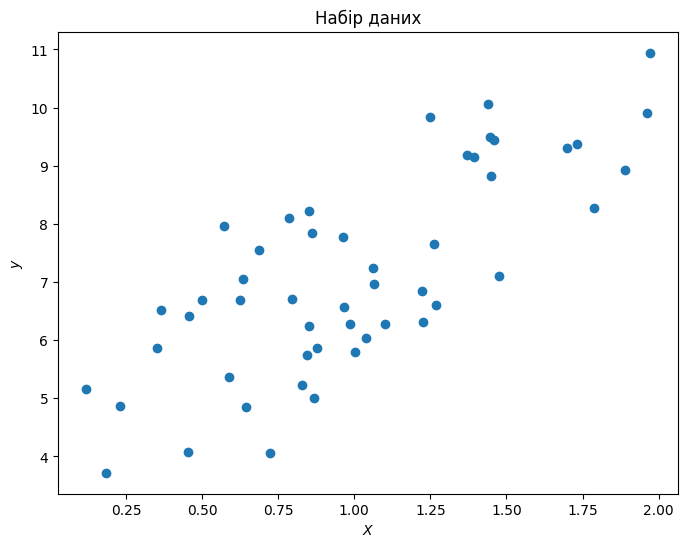

In [49]:
# We will use a simple training set
X = 2 * np.random.rand(50, 1)
y = 3 * X + 4 + np.random.randn(50, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

## Поділ набору даних

In [50]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (37, 1)
Shape y_train: (37, 1)
Shape X_test: (13, 1)
Shape y_test: (13, 1)


In [51]:
X_train[:,0].shape

(37,)

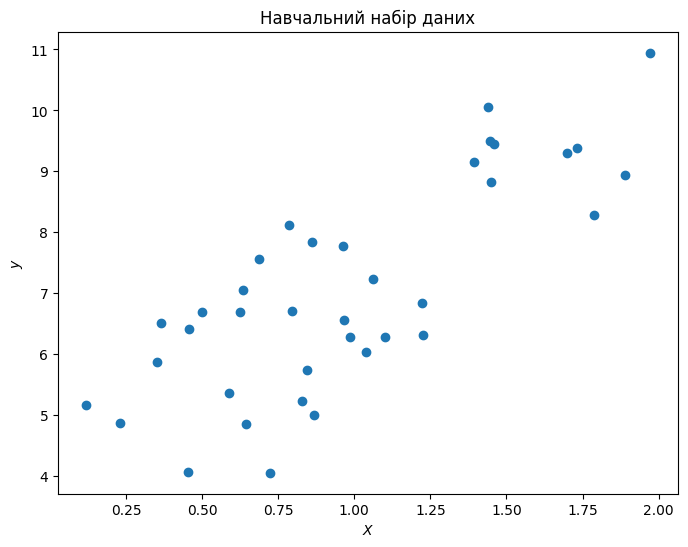

In [52]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.title("Навчальний набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

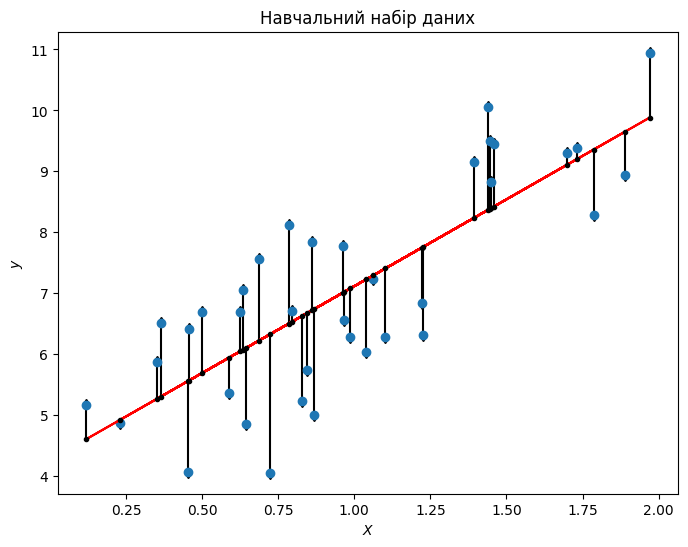

In [53]:
coef = np.polyfit(X_train[:,0], y_train[:,0], 1)
poly1d_fn = np.poly1d(coef)  # to create a linear function with coefficients
up = poly1d_fn(X_train[:,0]) - y_train[:,0] > 0
low= poly1d_fn(X_train[:,0]) - y_train[:,0] < 0

fig = plt.figure(figsize=(8,6))
plt.errorbar(X_train[:,0], poly1d_fn(X_train[:,0]), yerr=abs(poly1d_fn(X_train[:,0]) - y_train[:,0]),  lolims=low, uplims = up, fmt='.k')
plt.plot(X_train[:,0], y_train[:,0], 'o', X_train[:,0], poly1d_fn(X_train[:,0]), '-r')
# plt.scatter(X_train, y_train)
plt.title("Навчальний набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

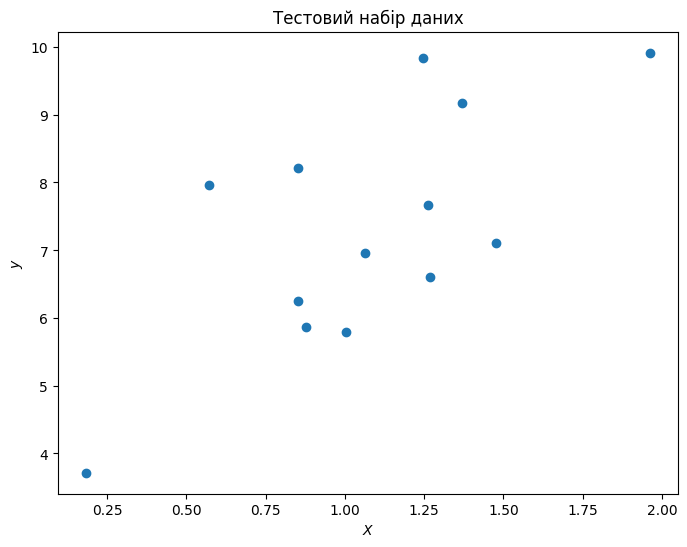

In [54]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test)
plt.title("Тестовий набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

In [55]:
n_samples, m_features = X_train.shape

In [56]:
n_samples

37

In [57]:
m_features

1

## Змінюємо форму $X$ та $y$ обох вибірок
$X = \text{X_train}$, 𝑋 — матриця форми (𝑚, 𝑛).

In [58]:
X_train = X_train.reshape((m_features, n_samples))

In [59]:
X_train.shape

(1, 37)

In [60]:
X_test = X_test.reshape((X_test.shape[1], X_test.shape[0]))

In [61]:
X_test.shape

(1, 13)

In [62]:
y_train = y_train.reshape((m_features,n_samples))

In [63]:
y_train.shape

(1, 37)

In [64]:
y_test = y_test.reshape((y_test.shape[1], y_test.shape[0]))

In [65]:
y_test.shape

(1, 13)

### Крок 0: Ініціалізувати ваги та зсув

In [66]:
def parameters_initialization(m):
    W = np.random.randn(1, m)
    b = 0.0
    return W, b

W, b = parameters_initialization(m_features)
W, W.shape, b

(array([[-0.31048223]]), (1, 1), 0.0)

In [67]:
W, b = parameters_initialization(m_features)

In [68]:
W

array([[0.31529775]])

In [69]:
W.shape

(1, 1)

In [70]:
b

0.0



### Крок 1: Обчислити лінійну комбінацію вхідних ознак та ваг, включаючи зсув



In [71]:
def forwardPropagate(X, W, b):
    if X.shape[0] != W.shape[1]:
        X = X.T

    z = np.dot(W, X) + b
    y_hat = z
    return z, y_hat

In [72]:
z, y_hat = forwardPropagate(X_train, W, b)

In [73]:
z

array([[0.30327349, 0.43919033, 0.20007879, 0.07290844, 0.45369389,
        0.11507846, 0.45683826, 0.53564786, 0.20365643, 0.38648852,
        0.26158754, 0.03763261, 0.27170012, 0.21640651, 0.27349   ,
        0.54629065, 0.18521475, 0.22814229, 0.45973546, 0.30459923,
        0.15793602, 0.24726754, 0.14394176, 0.59538305, 0.19691052,
        0.3351939 , 0.1430515 , 0.56336718, 0.62148956, 0.26680903,
        0.32758497, 0.45556954, 0.11063909, 0.34765661, 0.3113156 ,
        0.38530867, 0.25100491]])

In [74]:
y_hat.shape

(1, 37)

### Крок 2: Обчислити усереднену втрату на всьому навчальному наборі даних. Цільова функція



In [75]:
def cost(n, y_hat, y_true):

    J = (1 / n) * np.sum((y_hat - y_true) ** 2)
    return J

In [76]:
J = cost(n_samples, y_hat, y_train)
J

48.02547900804167

### Крок 3: Розрахувати градієнти цільвої функції відносно ваг та зсуву

In [77]:
def backwardPropagate(n, X, y_hat, y_true):
    """
    Ця функція обчислює градієнти цільової функції відносно ваг та зсуву

    Параметри:
    n -- загальна кількість навчальних прикладів
    X -- вхідний вектор ознак форми (m, X_train.shape[1])
    y_hat -- вихідне значення лінійної регресії
    y_true -- істинне значення залежної змінної

    Повертає:
    dW -- градієнт цільової функції відносно ваг моделі
    db -- градієнт цільової функції відносно зсуву моделі
    """
    # Різниця між прогнозованими значеннями та істинними
    diff = y_hat - y_true
    
    # Перевіримо, чи форма diff сумісна з очікуванням, і за потреби скоригуємо її
    if diff.shape[0] != 1:
        diff = diff.T  # Переконаємося, що форма diff є (1, n)
    
    # Транспонуємо X для правильного множення, якщо потрібно
    if X.shape[0] != n:
        X = X.T  # Переконаємося, що X має форму (n, m)
    
    # Обчислення градієнта для ваг
    dW = (2 / n) * np.dot(diff, X)
    
    # Обчислення градієнта для зсуву
    db = (2 / n) * np.sum(diff)
    
    return dW, db

# Виклик функції та перевірка результату
dW, db = backwardPropagate(n_samples, X_train, y_hat, y_train)
dW, db

(array([[-14.33691726]]), -13.479554785839303)

In [78]:
dW, db = backwardPropagate(n_samples, X_train, y_hat, y_train)

In [79]:
dW

array([[-14.33691726]])

In [80]:
dW.shape

(1, 1)

In [81]:
db

-13.479554785839303

In [82]:
db.shape

()

### Крок 4: Оновити ваги та зсув

In [83]:
def update(alpha, dW, db, W, b):
    W = W - alpha * dW
    b = b - alpha * db
    
    return W, b

In [84]:
W, b = update(0.0001, dW, db, W, b)

In [85]:
W

array([[0.31673144]])

In [86]:
b

0.0013479554785839304

# Клас лінійної регресії

In [87]:
class LinearRegression:

  def __init__(self):
      pass
  def train_model(self, X, y, alpha=0.01, n_iters=100):
    """
    Trains a linear regression model using gradient descent
    """
    # Step 0: Initialize the parameters
    n_features, n_samples = X.shape
    self.W, self.b = parameters_initialization(n_features)
    costs = []
    for i in range(n_iters):
      # Step 1: Compute a linear combination of the input features and weights
      z, y_hat = forwardPropagate(X_train, self.W, self.b)
      # Step 2: Compute cost over training set
      J = cost(n_samples, y_hat, y_train)
      costs.append(J)
      if i % 20 == 0:
        print(f"Усереднена втрата моделі на ітерації {i}: {J}")
      # Step 3: Compute the gradients
      dW, db = backwardPropagate(n_samples, X_train, y_hat, y_train)
      # Step 4: Update the parameters
      self.W, self.b = update(alpha, dW, db, self.W, self.b)
    return self.W, self.b, costs
  def predict(self, X):
    return np.dot(self.W, X) + self.b

  def evaluate(self, X, y):
      return 1 / X.shape[1] * np.sum(((np.dot(self.W, X) + self.b) - y)**2)

Усереднена втрата моделі на ітерації 0: 64.03950254075096
Усереднена втрата моделі на ітерації 20: 1.9769687277876697
Усереднена втрата моделі на ітерації 40: 1.1901824704614978
Усереднена втрата моделі на ітерації 60: 1.172702946525409
Усереднена втрата моделі на ітерації 80: 1.1663597324661947
Усереднена втрата моделі на ітерації 100: 1.1613616975657683
Усереднена втрата моделі на ітерації 120: 1.157348844638629
Усереднена втрата моделі на ітерації 140: 1.1541260266607751
Усереднена втрата моделі на ітерації 160: 1.1515376926580845
Усереднена втрата моделі на ітерації 180: 1.1494589300851001
Усереднена втрата моделі на ітерації 200: 1.147789418408787
Усереднена втрата моделі на ітерації 220: 1.1464485874386603
Усереднена втрата моделі на ітерації 240: 1.1453717290279306
Усереднена втрата моделі на ітерації 260: 1.1445068742754703
Усереднена втрата моделі на ітерації 280: 1.143812285520439
Усереднена втрата моделі на ітерації 300: 1.143254442093849
Усереднена втрата моделі на ітерації

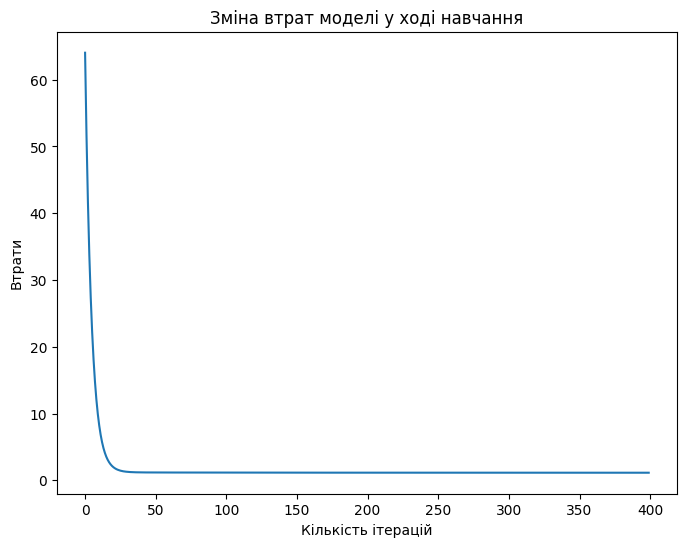

In [88]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_model(X_train, y_train, alpha=0.025, n_iters=400)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(400), costs)
plt.title("Зміна втрат моделі у ході навчання")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Втрати")
plt.show()

# Вивчені коефіцієнти: $ W$ та $b$

На початку ми згенерували вибірку за правилом: `y = 3 * X + 4 + np.random.randn(100, 1)`

In [89]:
w_trained

array([[2.9087029]])

In [90]:
b_trained

4.196081151308348

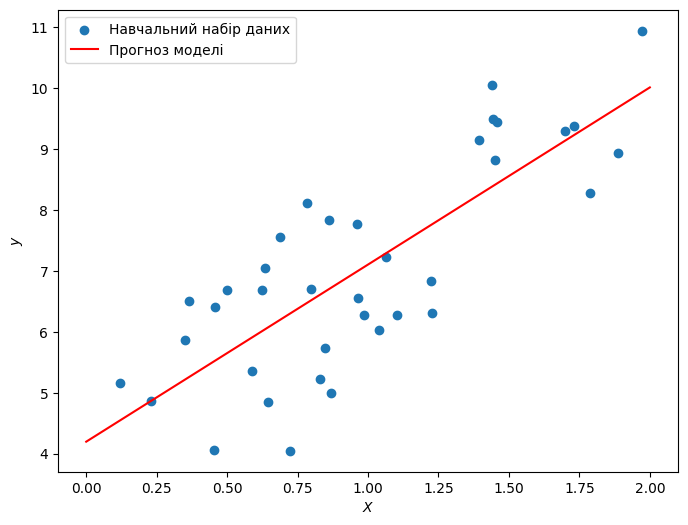

In [91]:
# Plot the trained model

fig = plt.figure(figsize=(8,6))

plt.scatter(X_train, y_train)
x = np.linspace(0, 2, 100)
x = x.reshape((x.shape[0], 1))
y_trained = w_trained * x + b_trained
plt.plot(x, y_trained, color='red')
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend(["Навчальний набір даних" , "Прогноз моделі"])
plt.show()

# Тестування моделі

In [92]:
y_hat_test = regressor.predict(X_test)

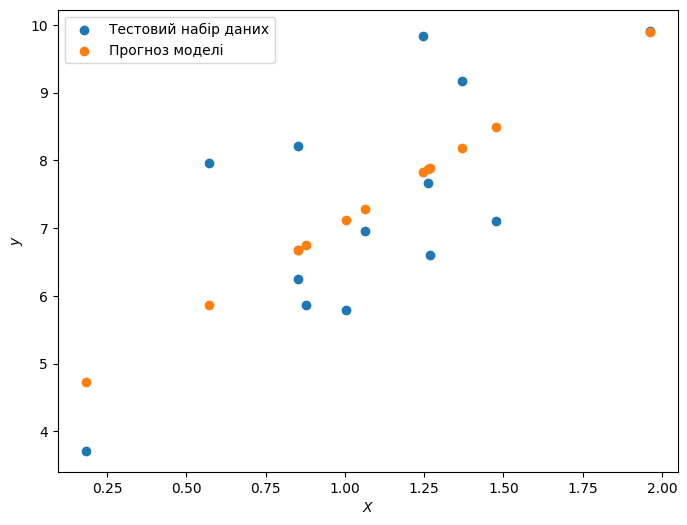

In [93]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_hat_test)
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend(["Тестовий набір даних" , "Прогноз моделі"])
plt.show()

In [94]:
cost_test = regressor.evaluate(X_test, y_test)
print(f"Усереднена втрата моделі на тестовій вибірці {cost_test}")

Усереднена втрата моделі на тестовій вибірці 1.4800869039890743




Завдання завершено.